In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.special import beta

# Data

In [2]:
data = {}

In [3]:
data['Mo16'] = np.array([[0.649999976, 0.0674641803, 0.01751679],\
                         [0.949999988, 0.0762328506, 0.0176014826],\
                         [1.29999995, 0.095839642, 0.019425964]])

In [4]:
data['Mo12'] = np.array([[0.316885, 0.0543, 0.01226],\
                         [0.373472, 0.0587, 0.00914],\
                         [0.430059, 0.0592, 0.01055],\
                         [0.486646, 0.0642, 0.00798],\
                         [0.543232, 0.0789, 0.01248],\
                         [0.599819, 0.0641, 0.00857],\
                         [0.656406, 0.0562, 0.01549]])

In [5]:
data['Az09'] = np.array([[0.325211, 0.0554529, 0.006793],\
                         [0.437557, 0.0579482, 0.0069316],\
                         [0.549902, 0.0718115, 0.0090111],\
                         [0.715464, 0.0754159, 0.0106747],\
                         [0.999285, 0.0903882, 0.0133088],\
                         [1.93352, 0.107024, 0.0134472],\
                         [2.30604, 0.0945471, 0.0130316],\
                         [2.74951, 0.0679298, 0.0099815],\
                         [3.28758, 0.0585028, 0.007902],\
                         [3.92618, 0.0451941, 0.0102588],\
                         [4.69486, 0.0418669, 0.0112293]])

In [18]:
data2 = {}

In [20]:
data2['Mo16'] = np.array([[0.649999976, 0.0438743494, 0.0113917897],\
                       [0.949999988, 0.057172969, 0.0132007264],\
                       [1.29999995, 0.0731263086, 0.0148221441]])

In [21]:
data2['Mo12'] = np.array([[0.316885, -0.300654, 0.110455],\
                       [0.373472, -0.198215, 0.0479896],\
                       [0.430059, -0.127115, 0.0359157],\
                       [0.486646, -0.11701, 0.03102],\
                       [0.543232, -0.05758, 0.033725],\
                       [0.599819, 0.02424, 0.047121],\
                       [0.656406, 0.03698, 0.053184]])

In [22]:
data2['Az09'] = np.array([[0.333206, -0.1875, 0.030556],\
                          [0.444276, -0.1472, 0.032639],\
                          [0.561191, -0.0541, 0.042361],\
                          [0.730716, -0.0097, 0.035416],\
                          [1.011310, 0.0263, 0.036111],\
                          [1.94079, 0.1222, 0.024305],\
                          [2.3149, 0.125, 0.017361],\
                          [2.75919, 0.091, 0.0125],\
                          [3.29699, 0.05416, 0.0125],\
                          [3.92833, 0.03472, 0.01041],\
                          [4.69997, 0.00833, 0.01111]])

In [6]:
def alphat(t, a0, al):
    return al * t + a0

In [29]:
def FF1(t, tau, a0, al):
    return - np.sqrt(tau - 1.0) / tau * (al * t) / (1.0 - a0) * beta(tau, 1.0 - a0 - al * t) / beta(tau, 1.0 - a0)

def FF2(t, tau, a0, al):
    return -(1.0 + np.sqrt(2.0)) / 4.0 * np.sqrt(tau - 1.0) / (tau**2 - 1.0) * ((tau - 1.0 + np.sqrt(tau * (tau - 1.0))) * al * t / (1.0 - a0) + 1.0 + tau) * beta(tau + 1.0, 1.0 - a0 - al * t) / beta(tau + 1.0, 1.0 - a0)

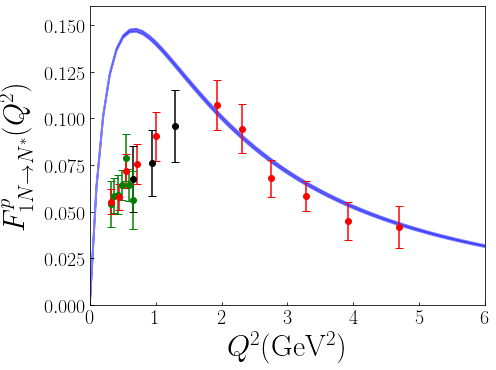

In [46]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols*7, nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)

Q2 = np.linspace(0, 10, 100)
F3 = FF1(-Q2, 3.0, 0.483, 0.8767)
F4 = FF1(-Q2, 4.0, 0.483, 0.8767)

ax.errorbar(data['Mo16'][:,0], data['Mo16'][:,1], yerr = data['Mo16'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'black', linestyle = '')
ax.errorbar(data['Mo12'][:,0], data['Mo12'][:,1], yerr = data['Mo12'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'green', linestyle = '')
ax.errorbar(data['Az09'][:,0], data['Az09'][:,1], yerr = data['Az09'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'red', linestyle = '')

ax.fill_between(Q2, F3, 1.05 * F3 - 0.05 * F4, linestyle = '-', linewidth = 2, color = 'blue', alpha = 0.5)


ax.set_xlim(0, 6)
ax.set_ylim(0, 0.16)
ax.set_xlabel(r'$Q^2(\rm GeV^2)$', size = 30)
ax.set_ylabel(r'$F^p_{1N\to N^*}(Q^2)$', size = 30)

ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 20)

fig.tight_layout()
fig.savefig('f1.pdf')

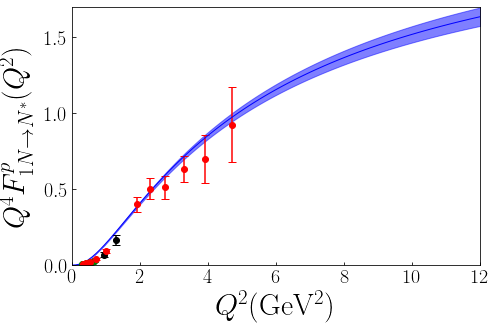

In [40]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols*7, nrows*7*0.67))
ax = fig.add_subplot(nrows, ncols, 1)

Q2 = np.linspace(0, 12, 100)
F3 = FF1(-Q2, 3.0, 0.483, 0.8767)
F4 = FF1(-Q2, 4.0, 0.483, 0.8767)

ax.errorbar(data['Mo16'][:,0], data['Mo16'][:,1] * data['Mo16'][:,0] ** 2, yerr = data['Mo16'][:,2] * data['Mo16'][:,0] ** 2,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'black', linestyle = '')
ax.errorbar(data['Mo12'][:,0], data['Mo12'][:,1] * data['Mo12'][:,0] ** 2, yerr = data['Mo12'][:,2] * data['Mo12'][:,0] ** 2,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'green', linestyle = '')
ax.errorbar(data['Az09'][:,0], data['Az09'][:,1] * data['Az09'][:,0] ** 2, yerr = data['Az09'][:,2] * data['Az09'][:,0] ** 2,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'red', linestyle = '')

ax.fill_between(Q2, Q2**2 * F3, Q2**2 * (1.1 * F3 - 0.1 * F4), linestyle = '-', linewidth = 1, color = 'blue', alpha=0.5)
ax.plot(Q2, Q2**2 * (1.05 * F3 - 0.05 * F4), linestyle = '-', linewidth = 1, color = 'blue')


ax.set_xlim(0, 12)
ax.set_ylim(0, 1.7)
ax.set_xlabel(r'$Q^2(\rm GeV^2)$', size = 30)
ax.set_ylabel(r'$Q^4F^p_{1N\to N^*}(Q^2)$', size = 30)

ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 20)

fig.tight_layout()
fig.savefig('q4f1.pdf')

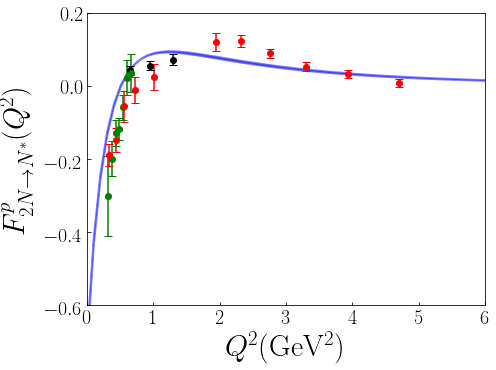

In [45]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols*7, nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
chi = 1.793

Q2 = np.linspace(0, 10, 100)
F4 = FF2(-Q2, 3.0, 0.483, 0.8767)
F6 = FF2(-Q2, 5.0, 0.483, 0.8767)

ax.errorbar(data2['Mo16'][:,0], data2['Mo16'][:,1], yerr = data2['Mo16'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'black', linestyle = '')
ax.errorbar(data2['Mo12'][:,0], data2['Mo12'][:,1], yerr = data2['Mo12'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'green', linestyle = '')
ax.errorbar(data2['Az09'][:,0], data2['Az09'][:,1], yerr = data2['Az09'][:,2],\
            marker = 'o', markersize = 6, capsize = 4, color = 'red', linestyle = '')

ax.fill_between(Q2, chi * (0.8 * F4 + 0.2 * F6), chi * (0.68 * F4 + 0.32 * F6), linestyle = '-', linewidth = 2, color = 'blue', alpha=0.5)


ax.set_xlim(0, 6)
ax.set_ylim(-0.6, 0.2)
ax.set_xlabel(r'$Q^2(\rm GeV^2)$', size = 30)
ax.set_ylabel(r'$F^p_{2N\to N^*}(Q^2)$', size = 30)

ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 20)

fig.tight_layout()
fig.savefig('f2.pdf')

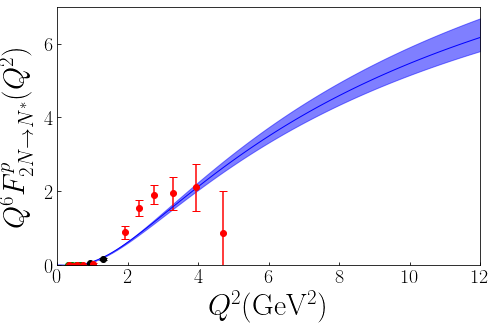

In [41]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols*7, nrows*7*0.67))
ax = fig.add_subplot(nrows, ncols, 1)

Q2 = np.linspace(0, 12, 100)
F4 = FF2(-Q2, 3.0, 0.483, 0.8767)
F6 = FF2(-Q2, 5.0, 0.483, 0.8767)

ax.errorbar(data2['Mo16'][:,0], data2['Mo16'][:,1] * data2['Mo16'][:,0] ** 3, yerr = data2['Mo16'][:,2] * data2['Mo16'][:,0] ** 3,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'black', linestyle = '')
ax.errorbar(data2['Mo12'][:,0], data2['Mo12'][:,1] * data2['Mo12'][:,0] ** 3, yerr = data2['Mo12'][:,2] * data2['Mo12'][:,0] ** 3,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'green', linestyle = '')
ax.errorbar(data2['Az09'][:,0], data2['Az09'][:,1] * data2['Az09'][:,0] ** 3, yerr = data2['Az09'][:,2] * data2['Az09'][:,0] ** 3,\
            marker = 'o', markersize = 6, capsize = 4, color  = 'red', linestyle = '')

ax.fill_between(Q2, Q2**3 * chi * (0.8 * F4 + 0.2 * F6), Q2**3 * chi * (0.68 * F4 + 0.32 * F6), linestyle = '-', linewidth = 1, color = 'blue', alpha=0.5)
ax.plot(Q2, Q2**3 * chi * (0.73 * F4 + 0.27 * F6), linestyle = '-', linewidth = 1, color = 'blue')


ax.set_xlim(0, 12)
ax.set_ylim(0, 7)
ax.set_xlabel(r'$Q^2(\rm GeV^2)$', size = 30)
ax.set_ylabel(r'$Q^6F^p_{2N\to N^*}(Q^2)$', size = 30)

ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 20)

fig.tight_layout()
fig.savefig('q6f2.pdf')